In [8]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import pdb
from utils.utils import *
from models.data_manager import DataManager
from models.mice_data_loader import MiceDataLoader

In [9]:
PROSVD_K = 4 # no. of dims to reduce to
PROSVD_INIT_FRAME = 100 # No of initial frames used to initialize proSVD

processed_dir = '/home/sachinks/Data/processed/mouse-cshl'

###
mouse_id = 'mSM49'
date = '03-Aug-2018'

filename = f'{mouse_id}_{date}_cam2'

video_metadata = {
    'shape': None,
    'fps': 15
}

dm = DataManager()

output_dir = '/home/sachinks/Data/output/mouse-cshl'
fig_dir = f'{output_dir}/figures'
# data_dir = f'{output_dir}/{filename}'


In [16]:
tx = (PROSVD_INIT_FRAME+np.arange(401))/video_metadata['fps']

# T, N, _ = Q_full.shape


In [11]:
def load_features(dm, data_dir):
    data = dm.load(data_dir, ['Q', 'ld', 'S'])
    Q_full = data['Q']
    ld = data['ld']
    S = data['S']

    Q_diff = np.diff(Q_full, axis=0)
    Q_norm_diff = np.linalg.norm(Q_diff, axis=1)
    Q_norm_diff = np.insert(Q_norm_diff, 0, 0, axis=0)

    mean_values = np.mean(ld, axis=0)
    std_values = np.std(ld, axis=0)
    ld_normalized = (ld - mean_values) / std_values
    ld_normalized -= ld_normalized[0]

    return Q_norm_diff, ld_normalized

def load_all_features(dm):
    data_dict = {
        'cam1': {},
        'cam2': {},
        'combined': {},
    }

    for key, dict_val in data_dict.items():
        # dict_val['dir'] = f'{mouse_id}_{date}_{key}'
        data_dir = f'{output_dir}/{mouse_id}_{date}_{key}'
        feat1, feat2 = load_features(dm, data_dir)
        dict_val['feat1'] = feat1
        dict_val['feat2'] = feat2

    return data_dict

In [12]:
data_all = load_all_features(dm)

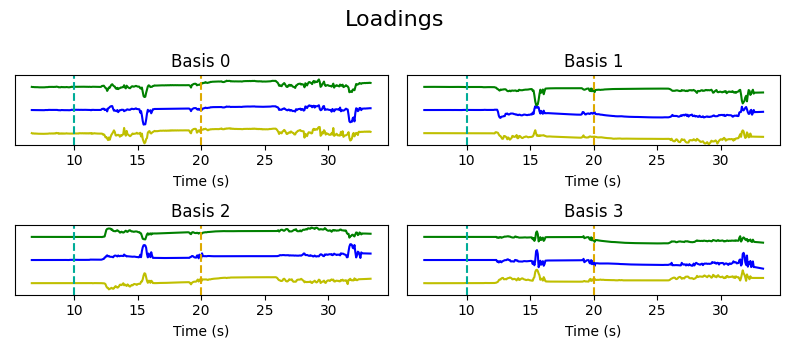

In [17]:
def plot_features(data_all):
    f1_10 = data_all['cam1']['feat2']
    f1_01 = data_all['cam2']['feat2']
    f1_11 = data_all['combined']['feat2']

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 3.5))

    # Flatten the axs array for easier iteration
    axs_flat = axs.flatten()

    # Loop through subplots
    for i, ax in enumerate(axs_flat):
        b_i = i # basis index
        a1 = 1.05*np.max([f1_10[:, b_i], f1_01[:, b_i], f1_11[:, b_i]]) # translation factor
        a2 = 1.05*np.min([f1_10[:, b_i], f1_01[:, b_i], f1_11[:, b_i]]) # translation factor
        a = a1 - a2
        ax.plot(tx, f1_10[:, b_i], c='y', label='Cam1')
        ax.plot(tx, a + f1_01[:, b_i], c='b', label='Cam2')
        ax.plot(tx, 2*a + f1_11[:, b_i], c='g', label='Combined')

        ax.set_ylim(-0.5*a, 2.5*a)
        ax.yaxis.set_ticks([])
        ax.set_xlabel('Time (s)')
        # ax.xaxis.set_ticks([])

        ax.axvline(x=10, color='#00ac98', linestyle='--')
        ax.axvline(x=20, color='#dda900', linestyle='--')

        ax.set_title(f'Basis {b_i}')

    plt.suptitle("Loadings", fontsize=16)

    plt.tight_layout()

    plt.show()


plot_features(data_all)


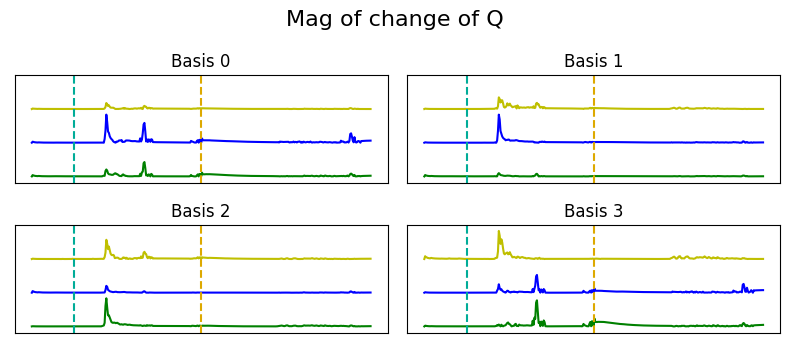

In [18]:
def plot_features(data_all):
    f1_10 = data_all['cam1']['feat1']
    f1_01 = data_all['cam2']['feat1']
    f1_11 = data_all['combined']['feat1']

    x = tx

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 3.5))

    # Flatten the axs array for easier iteration
    axs_flat = axs.flatten()

    # Loop through subplots
    for i, ax in enumerate(axs_flat):
        b_i = i # basis index
        a = 1.2*np.max([f1_10[:, b_i], f1_01[:, b_i], f1_11[:, b_i]]) # translation factor
        ax.plot(tx, f1_10[:, b_i], c='y', label='Cam1')
        ax.plot(tx, a + f1_01[:, b_i], c='b', label='Cam2')
        ax.plot(tx, 2*a + f1_11[:, b_i], c='g', label='Combined')

        ax.set_ylim(-0.2*a, 3*a)
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])

        ax.axvline(x=10, color='#00ac98', linestyle='--')
        ax.axvline(x=20, color='#dda900', linestyle='--')

        ax.set_title(f'Basis {b_i}')

    plt.suptitle("Mag of change of Q", fontsize=16)

    plt.tight_layout()

    plt.show()


plot_features(data_all)


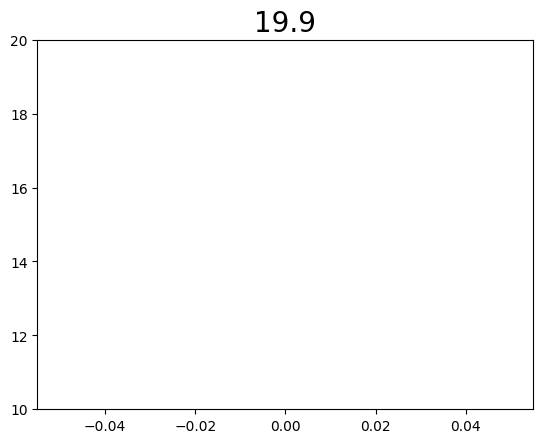

In [161]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tempfile import NamedTemporaryFile
import imageio

# Create a figure and axis
fig, ax = plt.subplots()

# Set the range for the y-axis
ax.set_ylim(10, 20)

# Create an empty plot
line, = ax.plot([], [])

# Function to update the plot for each frame
def update(frame):
    # Calculate the number for this frame
    current_number = 10 + (frame * 0.1)
    
    # Update the plot with the new number
    line.set_data([], [])
    ax.set_title(f'{current_number:.1f}', fontsize=20)
    return line,

# Create the animation
frames = 100
fps = 10
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Create a temporary file to save the animation
with NamedTemporaryFile(suffix='.gif') as f:
    ani.save(f.name, writer='pillow', fps=fps)
    f.seek(0)
    gif = imageio.mimread(f)
    imageio.mimsave('number_animation_matplotlib.gif', gif, fps=fps)


In [133]:
def plot_data(data, super_title):
    x = tx

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 3.5))

    # Flatten the axs array for easier iteration
    axs_flat = axs.flatten()

    # Loop through subplots
    for i, ax in enumerate(axs_flat):
        y = data[i]['value']
        # pdb.set_trace()
        for k in range(PROSVD_K):
            ax.plot(x, y[:, k], label=f'Basis {k+1}')
        ax.set_title(data[i]['title'])
        # ax.legend()

    # Add a super title
    plt.suptitle(super_title, fontsize=16)
    plt.xlabel("Time (s)")

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig(f'{fig_dir}/{super_title}.png')
    # Show the plots
    plt.show()


In [134]:
data = [
    {
        'value': Q_norm_diff,
        'title':'Magnitude of change of Q'
    },
    {
        'value': S,
        'title':'Singular values'
    },
    {
        'value': ld,
        'title':'Loadings'
    },
    {
        'value': ld_normalized,
        'title':'Loadings (normalized)'
    },
]

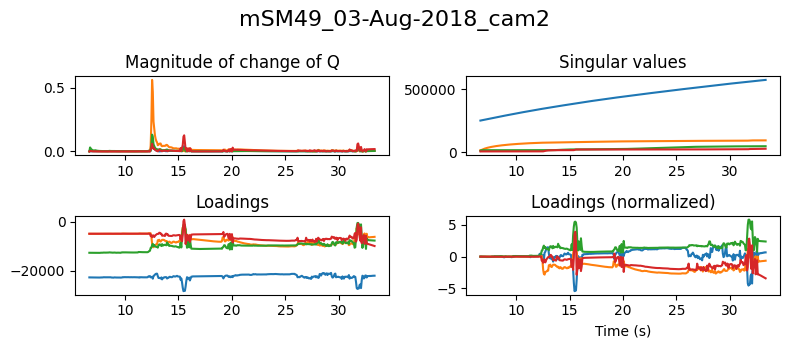

In [135]:
plot_data(data, filename)

In [89]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.animation import FuncAnimation

# # Sample x and y coordinates for your trajectory
# xlim = [ld[:, 0].min(), ld[:, 0].max()]
# ylim = [ld[:, 1].min(), ld[:, 1].max()]

# start_f = 0
# end_f = ld.shape[0]
# fps = video_metadata['fps']

# x = smooth_data(ld[start_f:end_f, 0])
# y = smooth_data(ld[start_f:end_f, 1])

# # Create a function to update the plot in each frame
# def update(frame):
#     plt.clf()  # Clear the previous frame
#     plt.plot(x[:frame], y[:frame])  # Plot the trajectory up to the current frame
#     plt.xlim(xlim[0], xlim[1])  # Adjust the x-axis limits as needed
#     plt.ylim(ylim[0], ylim[1])  # Adjust the y-axis limits as needed
#     plt.xlabel('Basis 1')
#     plt.ylabel('Basis 2')
#     plt.title(f'Time: {(frame+start_f+PROSVD_INIT_FRAME)//fps}s')
#     plt.xticks([])  # Hide x ticks
#     plt.yticks([])  # Hide y ticks

# # Create an animation
# fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the values as needed
# ani = FuncAnimation(fig, update, frames=len(x), repeat=False)

# # Save the animation as a GIF
# ani.save('trajectory_mice.gif', writer='pillow', fps=fps)  # Adjust the frame rate (fps) as needed
